# Práctica 5 de IA

## 1. Construcción de clasificadores en bases de datos sintéticas

In [1]:
# Esta primera parte está adaptada de:
# http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

%matplotlib inline

In [24]:
# data preparation
simple = make_blobs(n_samples=500, n_features=2,
                    centers=[[0,0], [2.5,2.5]],
                    random_state=1)
#print 'El valor simple es: '
#print simple
#print 'Y fin del simple'
X,y = make_blobs(n_samples=500, n_features=2,
                 centers=[[0,0], [5,1]],
                 random_state=1)
X = X*np.matrix([[1,-2],[-20,10]])
linearly_separable=(X,y)

datasets = [simple,
            linearly_separable,
            make_moons(noise=0.1, random_state=0, n_samples=500),
            make_circles(noise=0.1, factor=0.5, random_state=1,
                         n_samples=500)
           ]

[[-2.31512244e+01  5.64391356e+00]
 [ 2.89860591e+00 -2.71059529e+00]
 [-1.00275765e+01  5.72684757e+00]
 [-3.28434284e+00  1.62668638e-01]
 [-2.69576363e+01  7.19208892e+00]
 [-6.22951576e+00  1.37425002e+00]
 [-9.17417741e-01 -8.21913151e+00]
 [-1.42587240e+01  8.28032672e+00]
 [-4.14088467e+01  2.11270278e+01]
 [ 1.32052256e+01 -1.26607174e+01]
 [-1.86898493e+01  4.68782507e+00]
 [-6.98250108e+00 -2.23709470e+00]
 [-9.73595532e+00 -4.23550130e+00]
 [ 7.35866989e+00 -3.19570914e+00]
 [-2.59822008e+01  1.36085592e+01]
 [-3.49862493e+01  1.62798581e+01]
 [-4.15436613e+01  2.49614581e+01]
 [ 1.47536698e+01 -1.77565233e+01]
 [ 5.30644661e+00 -3.13178195e+00]
 [ 3.41324837e+01 -1.77431679e+01]
 [-3.40653625e+01  8.54015965e+00]
 [-2.18387317e+01  1.90741616e+00]
 [-1.52781110e+01  7.01310250e+00]
 [-1.31810810e+01  4.10083725e+00]
 [-4.58912232e+01  1.51319666e+01]
 [ 1.35230854e+01 -1.44717075e+01]
 [ 3.79283324e+00 -1.56292440e+00]
 [-1.14680788e+01  5.12880195e+00]
 [ 1.46245877e+01 -6

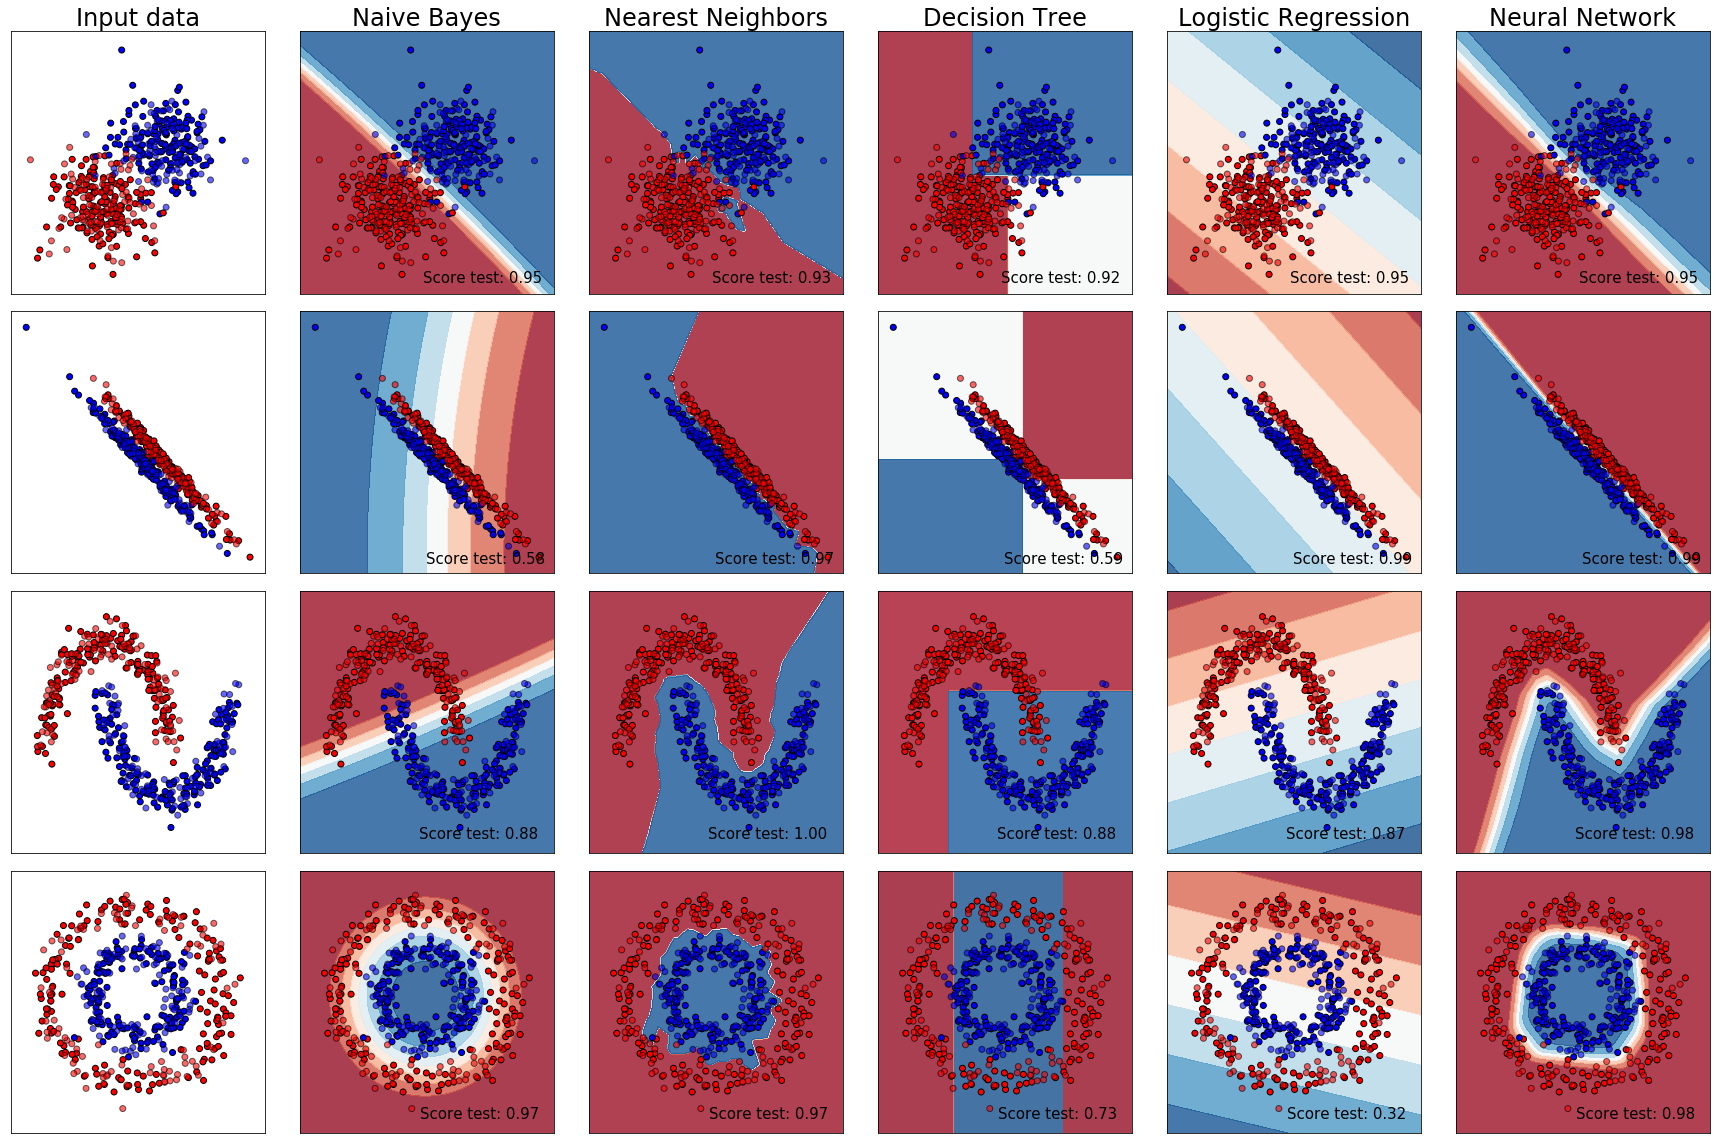

In [28]:
classifiers = [("Naive Bayes", GaussianNB()),
               ("Nearest Neighbors",
                KNeighborsClassifier(n_neighbors=1)), # número de vecinos
               ("Decision Tree",
                DecisionTreeClassifier(criterion='entropy',
                                       max_depth=2)), # profundidad máxima del árbol
               ("Logistic Regression",
                LogisticRegression(C=1e10)), # C: cuanto más alto menos regularización 
               ("Neural Network",
                MLPClassifier(hidden_layer_sizes=(50,), # tamaño capas ocultas
                              max_iter=1000, # número máximo de iteraciones
                              alpha=0))] # factor de regularización

from p5_IA_aux import plot_classifiers

plot_classifiers(classifiers, datasets)

In [25]:
# Listado de los parámetros de los diferentes clasificadores
for name, clf in classifiers:
    print(clf)

GaussianNB(priors=None)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
MLPClassifier(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant

Prueba a cambiar los siguientes parámetros y observa las consecuencias en la frontera de clasificación construida:

* Número de vecinos en k-nn: Prueba a ir subiendo este número. ¿Por qué siempre debe ser impar cuando hay dos clases?
* Profundidad máxima de los árboles de decisión: Prueba a ir subiendo este número.
* Factor de regularización (C) en la regresión logística: prueba C=1e10, C=1 y C=1e-7.
* Número de neuronas en la red neuronal y máximo número de épocas de entrenamiento. ** Nota: ** (50,) indica una única capa oculta con 50 neuronas. Prueba a reducir este número. También puedes probar a introducir más de una capa oculta. Por ejemplo, (50,10,) indica dos capas ocultas con 50 y 10 neuronas respectivamente; (50,10,20,) indica tres capas ocultas con 50, 10 y 20 neuronas respectivamente, etc.

* Si lo subo mejor score recibe, NO IDEA DE PORQUE...
* Hasta 4 rentable, a partir de ahí, innecesario
* El mejor el menos regularizado, el más alto, 1e10
* Al reducir baja la concentrica, las demas no. Con tres capas mejor que con dos y dos mejor que una.

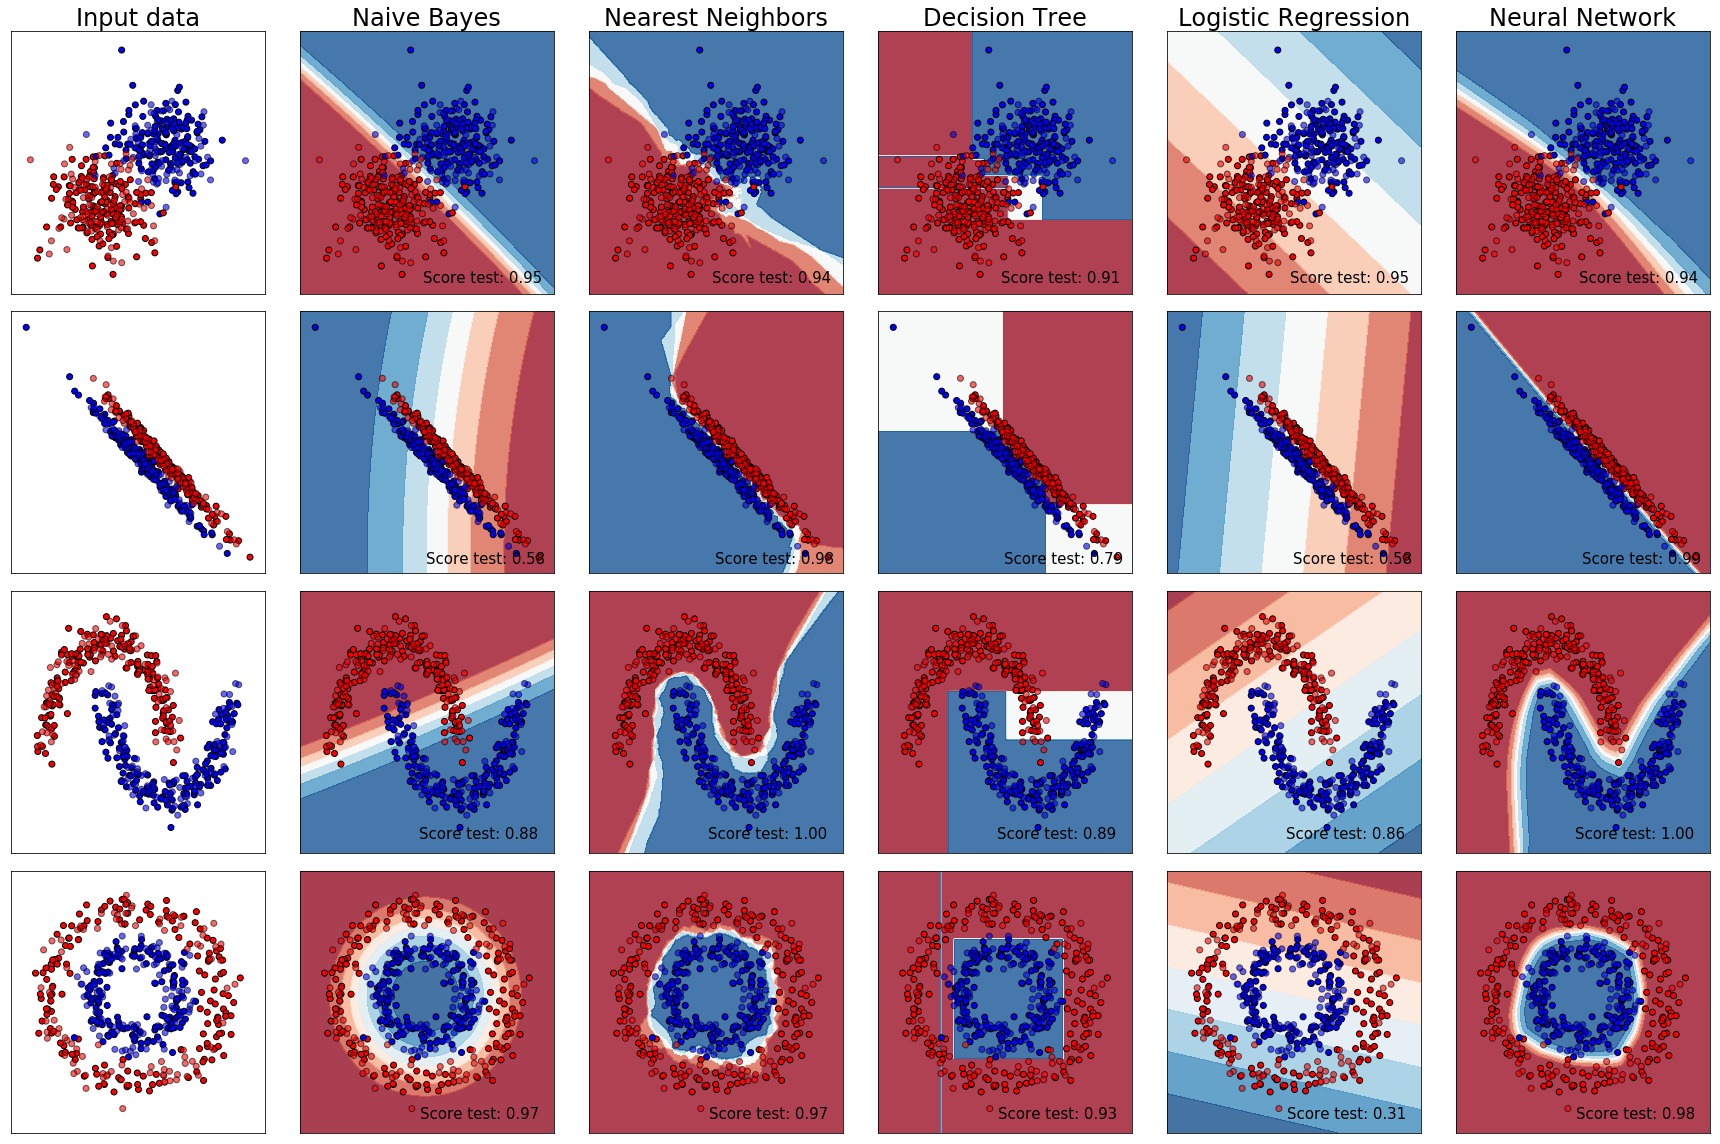

In [46]:
classifiers = [("Naive Bayes", GaussianNB()),
               ("Nearest Neighbors",
                KNeighborsClassifier(n_neighbors=4)), # número de vecinos
               ("Decision Tree",
                DecisionTreeClassifier(criterion='entropy',
                                       max_depth=4)), # profundidad máxima del árbol
               ("Logistic Regression",
                LogisticRegression(C=1e-7)), # C: cuanto más alto menos regularización 
               ("Neural Network",
                MLPClassifier(hidden_layer_sizes=(50,10), # tamaño 1capas ocultas
                              max_iter=1000, # número máximo de iteraciones
                              alpha=0))] # factor de regularización

from p5_IA_aux import plot_classifiers

plot_classifiers(classifiers, datasets)

# 2. Construcción de un clasificador en una base de datos real

In [47]:
import pandas as pd
df = pd.read_csv("pima_construccion.csv", header=0, sep=',')
print(df.shape)
df.head(5)

(668, 9)


,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,yes
1,1,85,66,29,0,26.6,0.351,31,no
2,8,183,64,0,0,23.3,0.672,32,yes
3,1,89,66,23,94,28.1,0.167,21,no
4,0,137,40,35,168,43.1,2.288,33,yes


* ** Pregnancies: ** Number of times pregnant
* ** Glucose: ** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* ** BloodPressure: ** Diastolic blood pressure (mm Hg)
* ** SkinThickness: ** Triceps skin fold thickness (mm)
* ** Insulin: ** 2-Hour serum insulin (mu U/ml)
* ** BMI: ** Body mass index (weight in kg/(height in m)^2)
* ** DiabetesPedigreeFunction: ** Diabetes pedigree function
* ** Age: ** Age (years)
* ** Class: ** Class variable (0 or 1)

In [8]:
df.describe()

,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,3.955090,120.640719,69.128743,20.564371,77.407186,32.084880,0.465904,33.416168
std,3.416744,31.893370,19.367082,15.986793,110.535247,7.852525,0.329423,11.926581
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.475000,0.240000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,22.500000,32.250000,0.368000,29.000000
75%,6.000000,140.250000,80.000000,32.000000,125.250000,36.600000,0.614250,41.000000
max,17.000000,199.000000,122.000000,99.000000,744.000000,67.100000,2.420000,81.000000


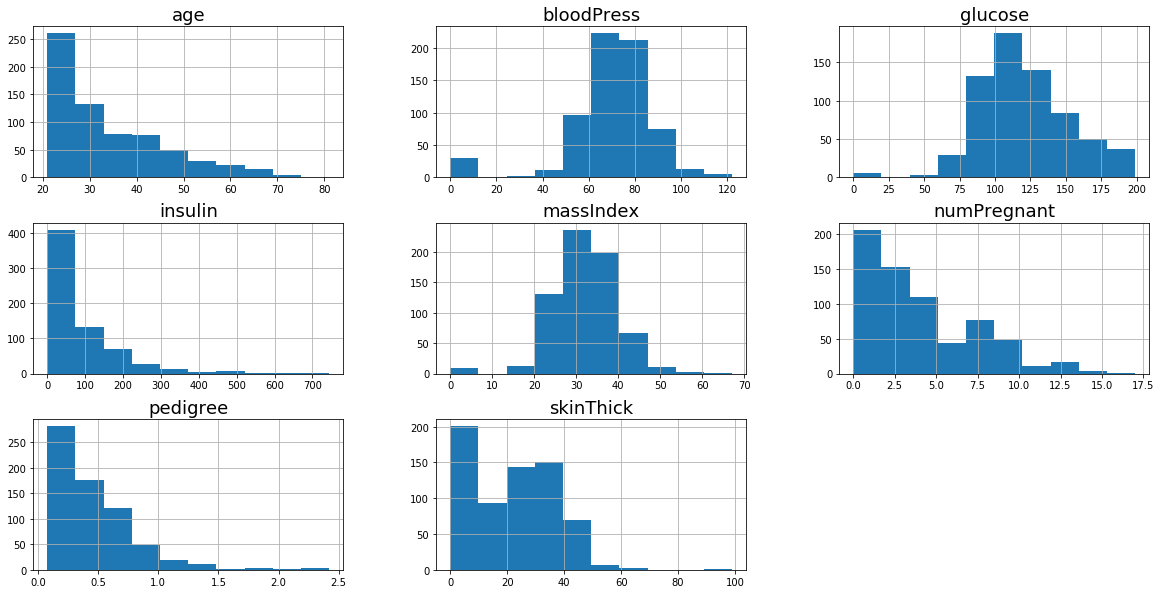

In [9]:
#### Histogram Matrix Plot
fig = df.hist(figsize=(20, 10))
[x.title.set_size(18) for x in fig.ravel()]
plt.show()

In [49]:
nombres_atrs = list(df.columns)
nombres_atrs.remove('class')
print(nombres_atrs)
X = df[nombres_atrs].values
y = df['class'].values

['numPregnant', 'glucose', 'bloodPress', 'skinThick', 'insulin', 'massIndex', 'pedigree', 'age']


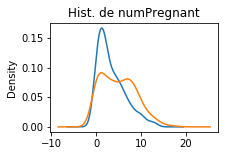

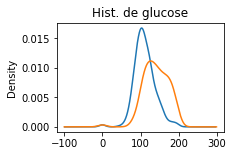

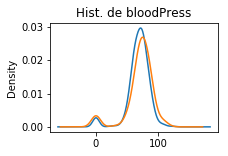

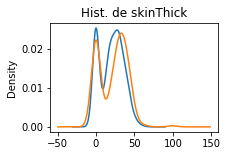

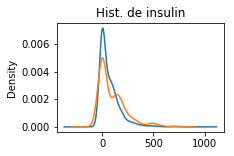

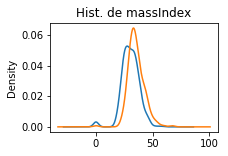

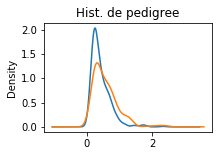

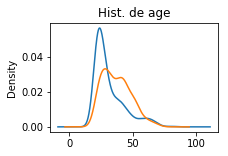

In [11]:
### Histogramas suavizados con diferentes clases
for n in nombres_atrs:
    plt.figure(figsize=(3,2))
    df.groupby("class")[n].plot(kind='kde',
                                title='Hist. de '+n)
    plt.show()

In [12]:
from sklearn.model_selection import cross_val_score

## Entrenamiento de un modelo y chequeo de su calidad usando 5-fold cross validation

La siguiente celda entrena un modelo y lo evalúa en varias particiones training-test diferentes de los datos. El resultado es un score medio junto a su desviación estándar. El tipo de modelo (Naïve Bayes / árbol de decisión / knn/ regresión logística / red neuronal) y parámetros empleados deberán ser seleccionados para que dicho resultado sea el mejor posible.

In [51]:
clf = DecisionTreeClassifier(max_depth=3)
scores = cross_val_score(clf, X, y, cv=5)
print("scores: ", scores)
print("{:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

('scores: ', array([0.7238806 , 0.73134328, 0.71641791, 0.78947368, 0.76691729]))
0.75 +/- 0.03


## Ajuste final del modelo usando todos los datos y predicción del conjunto de explotación

El modelo seleccionado en la celda anterior se ajustará ahora usando todos los datos etiquetados disponibles, y se usará para predecir datos no etiquetados (base de datos de "explotación"). Se guardarán dichas predicciones en el archivo de predicciones de explotación.

In [52]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [53]:
df_explotacion = pd.read_csv("pima_explotacion.csv", header=0, sep=',')
df_explotacion.head(5)

,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age,class
0,2,197,70,45,543,30.5,0.158,53,NaN
1,8,125,96,0,0,0.0,0.232,54,NaN
2,4,110,92,0,0,37.6,0.191,30,NaN
3,10,168,74,0,0,38.0,0.537,34,NaN
4,10,139,80,0,0,27.1,1.441,57,NaN


In [16]:
X_explotacion = df_explotacion[nombres_atrs].values
predicciones = clf.predict(X_explotacion)

f = open("predicciones_explotacion.txt", "w")
for pred in predicciones:
    f.write(str(pred)+"\n")
f.close()